                                                          Assignment 2:


  Modules:

In [4]:
# numpy : to deal with array
import numpy as np
#pandas : to deal with data(read,EDA,....)
import pandas as pd
#matplotlib.pyplot,seaborn : to draw
import matplotlib.pyplot as plt
import seaborn as sns
#sklearn.metrics: to evaluate the model and compare between the difference models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#MinMaxScaler: make the data between min and max that you choose them(for scaler the data)
from sklearn.preprocessing import MinMaxScaler
#LabelEncoder : to encode the non_numerical columns 
from sklearn.preprocessing  import LabelEncoder
#LogisticRegression : to fit LogisticRegression
from sklearn.linear_model import LogisticRegression
#confusion_matrix and display : to compare between right values and predictions by numbers 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#metrics : to calculate the accuracy
from sklearn import metrics
#train_test_split to divide the data into test ,train and validation,KFold to make cross validation
#cross_val_score to calculate the score of val part,StratifiedKFold to make cross validation (unbalanced data)
#GridSearchCV to search about best value to hyperpharemeter
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score, StratifiedKFold, GridSearchCV
#accuracy_score to calculate the accuracy of classification models
from sklearn.metrics import accuracy_score
#KNeighborsClassifier to fit KNN model
from sklearn.neighbors import KNeighborsClassifier
# RandomForestRegressor to fit random forest model
from sklearn.ensemble import RandomForestRegressor
#validation_curve to calculate the best value of hyperpharemeter
from sklearn.model_selection import validation_curve
#classification_report to calcalute different messaures of classification ( recall ,f1_score,......)
from sklearn.metrics import classification_report

Read Data and preprocess it :

In [6]:
logisticdata=pd.read_csv('C:/Users/El_manfy/Downloads/diabetes_prediction_dataset.csv')
logisticdata

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [7]:
# we will explore the data. we will see missing values ,duplication ,consistency,....
logisticdata.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
logisticdata.duplicated().sum()

3854

In [9]:
logisticdata=logisticdata.drop_duplicates()
logisticdata['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [10]:
logisticdata['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [11]:
logisticdata.loc[logisticdata['gender']=='Other','gender']= 'Male'

In [12]:
logisticdata['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

now --> we will change non-numerical columns to numerical using labelencoder
and scale all features bettween 0 and 1 

In [14]:
scaler=MinMaxScaler(feature_range=(0,1))
label1=LabelEncoder()
logisticdata.loc[:,'gender']=label1.fit_transform(logisticdata['gender'])
logisticdata.loc[:,'smoking_history']=label1.fit_transform(logisticdata['smoking_history'])
logisticdata.loc[:,'age']=scaler.fit_transform(logisticdata[['age']])
logisticdata.loc[:,'bmi']=scaler.fit_transform(logisticdata[['bmi']])
logisticdata.loc[:,'HbA1c_level']=scaler.fit_transform(logisticdata[['HbA1c_level']])
logisticdata.loc[:,'blood_glucose_level']=scaler.fit_transform(logisticdata[['blood_glucose_level']])
logisticdata.loc[:,'smoking_history']=scaler.fit_transform(logisticdata['smoking_history'].values.reshape(-1,1))
logisticdata

C:\Users\El_manfy\AppData\Local\Temp\ipykernel_1452\3857494020.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.27272727 0.         0.35454545 ... 0.34090909 0.09090909 0.04545455]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  logisticdata.loc[:,'blood_glucose_level']=scaler.fit_transform(logisticdata[['blood_glucose_level']])


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.000000,0,1,0.8,0.177171,0.563636,0.272727,0
1,0,0.674675,0,0,0.0,0.202031,0.563636,0.000000,0
2,1,0.349349,0,0,0.8,0.202031,0.400000,0.354545,0
3,0,0.449449,0,0,0.2,0.156863,0.272727,0.340909,0
4,1,0.949950,1,1,0.2,0.118231,0.236364,0.340909,0
...,...,...,...,...,...,...,...,...,...
99994,0,0.449449,0,0,0.0,0.170285,0.236364,0.295455,0
99996,0,0.024024,0,0,0.0,0.085901,0.545455,0.090909,0
99997,1,0.824825,0,0,0.6,0.207983,0.400000,0.340909,0
99998,0,0.299299,0,0,0.8,0.296569,0.090909,0.090909,0


we will use correlation heatmap to see the feature . from it we can notice that blood_glucose_level(x) has a strongest relation with diabetes(target)(y)



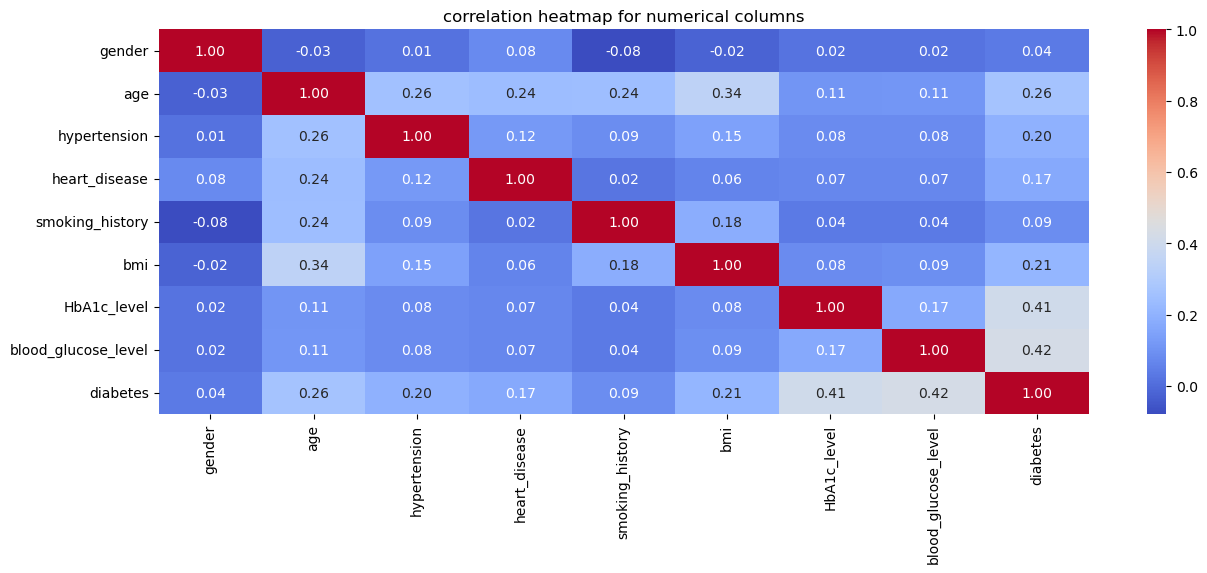

In [16]:
corrccolums=['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level','diabetes']
correlation_matrix=logisticdata[corrccolums].corr()
plt.figure(figsize=(15,5))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation heatmap for numerical columns')
plt.show()

Now : we will fit KNN model:

In [18]:
# we determinate x ( all columns expected our target),y (our target)
xtotal=logisticdata.iloc[:,:-1].values
y=logisticdata['diabetes'].values

In [19]:
# we will spilt data into 60% for training , 20% for test and 20% for validation
x_train,x_testev,y_train,y_testev=train_test_split(xtotal,y,test_size=0.4,random_state=1)
x_val,x_test,y_val,y_test=train_test_split(x_testev,y_testev,test_size=0.5,random_state=1)

In [20]:
#we take object from KNeighborsClassifier with n_neighbors=2 ( we can change 2). then we will fit the model ( train it with our training data)
model=KNeighborsClassifier(n_neighbors=2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [21]:
# we will see the accuracy of this model when we use ( x_train,x_val,x_test) to predict y_predict and compare it with true values of y.
y_predict=model.predict(x_train)
accuracy_score(y_train,y_predict)

0.9722814498933902

In [22]:
y_predict=model.predict(x_val)
accuracy_score(y_val,y_predict)

0.9570960528368609

In [23]:
y_predict=model.predict(x_test)
accuracy_score(y_test,y_predict)

0.959334373374935

we can notice that accuracy of train ,test and validation is biggger. This means that KNN is best model until now.

we will now use validation data to choose best k :

In [26]:
# we put k from 1 to 30 ( step=1)
k=range(1,30,1)
# compare will have the value of k and accuracy when we use this k.
compare={}
# we will fit model for each value of k and calculate accuracy_score
# we will add the value of k and its accuracy_score to our dictionary(compare)
for i in k :
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_predict=model.predict(x_val)
    compare[i] = accuracy_score(y_val,y_predict)
# After finish all loops. we will sort our accuracy_score desc
compare=dict(sorted(compare.items(),key=lambda item: item[1],reverse=True))
compare   

{8: 0.9587082011545062,
 10: 0.9587082011545062,
 6: 0.958656196370066,
 11: 0.958656196370066,
 9: 0.9584481772323054,
 7: 0.9583961724478652,
 4: 0.9580841437412242,
 12: 0.9580321389567841,
 13: 0.9579281293879037,
 5: 0.9578241198190234,
 17: 0.957720110250143,
 16: 0.9573560767590619,
 20: 0.9573560767590619,
 21: 0.9573560767590619,
 14: 0.9572520671901815,
 19: 0.9572520671901815,
 18: 0.9572000624057413,
 2: 0.9570960528368609,
 15: 0.9570440480524208,
 23: 0.9568880336991004,
 22: 0.9566800145613397,
 27: 0.9566280097768994,
 25: 0.956471995423579,
 24: 0.9564199906391389,
 26: 0.9562119715013782,
 29: 0.9560559571480576,
 28: 0.9557959332258568,
 3: 0.9549118518903739,
 1: 0.9473711581465495}

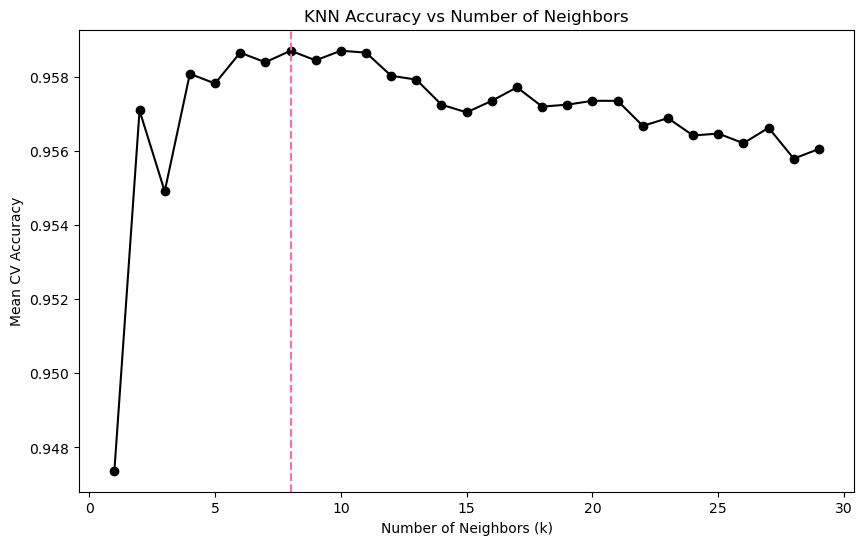

In [27]:
# we can see that 8 is the best value of k when we use validation data to arrange accuracy_score.
# now , we will draw the all k and their accuracy_score
# xlab express about value of k
xlab=range(1,30,1)
# ylab contains the value of accuracy_score to all k.
ylab=[compare[value] for value in xlab]
plt.figure(figsize=(10,6))
# we will draw plot with marker 'o'. we will draw axvline that has x=8 (the best k)
plt.plot(xlab,ylab,marker='o', color='black')
plt.axvline(x=8,color='hotpink',linestyle='--')
plt.title('KNN Accuracy vs Number of Neighbors')
plt.xlabel ('Number of Neighbors (k)')
plt.ylabel ('Mean CV Accuracy')
plt.show()

Another way to choose the best parameter by using grid search ( the best ) :

In [29]:
# knn has 2 hyperparameter (n_neighbors: number of nearest  neighbors)
# metric : the way to calculate the destance .
param_grid = {
    'n_neighbors': range(1, 10), 
    'metric': ['euclidean', 'manhattan']     
}

In [30]:
# we make object of KNeighborsClassifier to give to gridsearch
#we use kfold to divide train part into 2 part (one for train 80%,one for val 20%) by different ways
# In our code n_splits=5 means divide the train data into 5 parts by five different ways.
#shuffle=True to divide it by five different ways.
# we use GridSearchCV : it take type of model (knn),our hyperparameter value , cv (cross validation) .
#scoring : the way to evaluate if this value of parameter are good.
# internal view: this code will take 1 and euclidean and fit knn for five different times .
# we will fit the model 100 times ( 10*2*5)
knn = KNeighborsClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=kfold,
    scoring='accuracy',
   )

In [31]:
# know we will use this grid search on our train data.
# we can now calcalute best_params_,best_score_
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy: {:.4f}".format(grid_search.best_score_))

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9}
Best CV Accuracy: 0.9609


After we know the best parameters , we can fit new model by using this data.we will see the accuracy of this new model (train,test,val)

In [33]:
model=KNeighborsClassifier(n_neighbors=9,metric='euclidean')
model.fit(x_train,y_train)
y_predict=model.predict(x_train)
print(accuracy_score(y_train,y_predict))
y_predict=model.predict(x_val)
print(accuracy_score(y_val,y_predict))
y_predict=model.predict(x_test)
print(accuracy_score(y_test,y_predict))

0.9652608039939674
0.9584481772323054
0.9593863754550181


we can notice that cross validation accuracy bigger than validation data and test data accuracy.
we can notice that test accuracy increase ( very small) ,but this means that CV makes profermance better.

In [35]:
# we can notice that only val_accuracy is become bigger, but train become smaller and test don't change .
# we will calculate precision , recall ,f1-score for test data.
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17502
           1       0.93      0.59      0.72      1728

    accuracy                           0.96     19230
   macro avg       0.95      0.79      0.85     19230
weighted avg       0.96      0.96      0.96     19230



Now we will use visualization to see the classifaction better.

In [37]:
# we will use confusion_matrix to compare between true value and predict value 
confusion_matrix(y_test, y_predict)

array([[17431,    71],
       [  710,  1018]], dtype=int64)

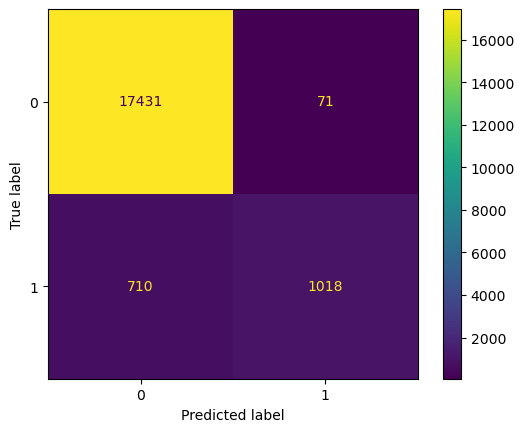

In [38]:
# we use ConfusionMatrixDisplay to see confusion_matrix in visual view.
#we can notice from it that FP are big .
d= ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict))
d.plot()
plt.show()

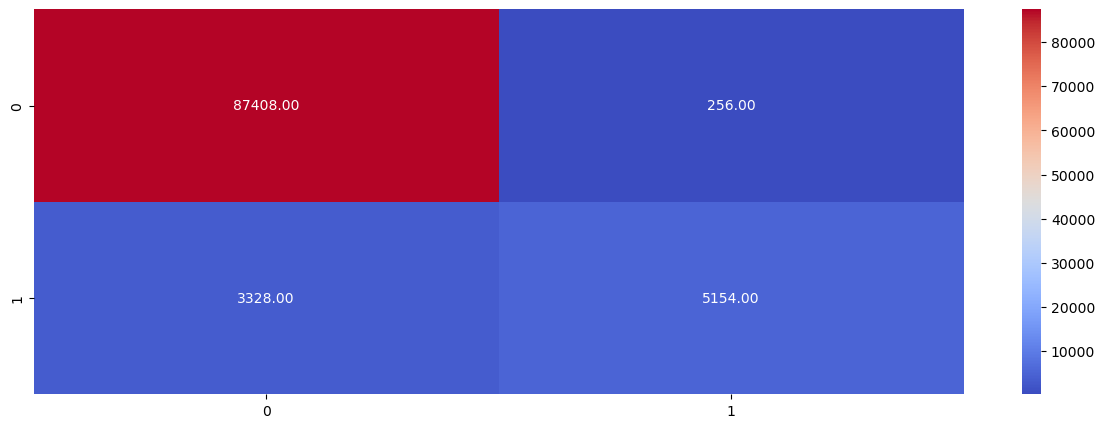

In [39]:
# we will draw heatmap that show true value and predict value for all data
pretotal=model.predict(xtotal)
cs=confusion_matrix(y,pretotal)
plt.figure(figsize=(15,5))
sns.heatmap(cs,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

From visualization we can see that this data is unbalanced.

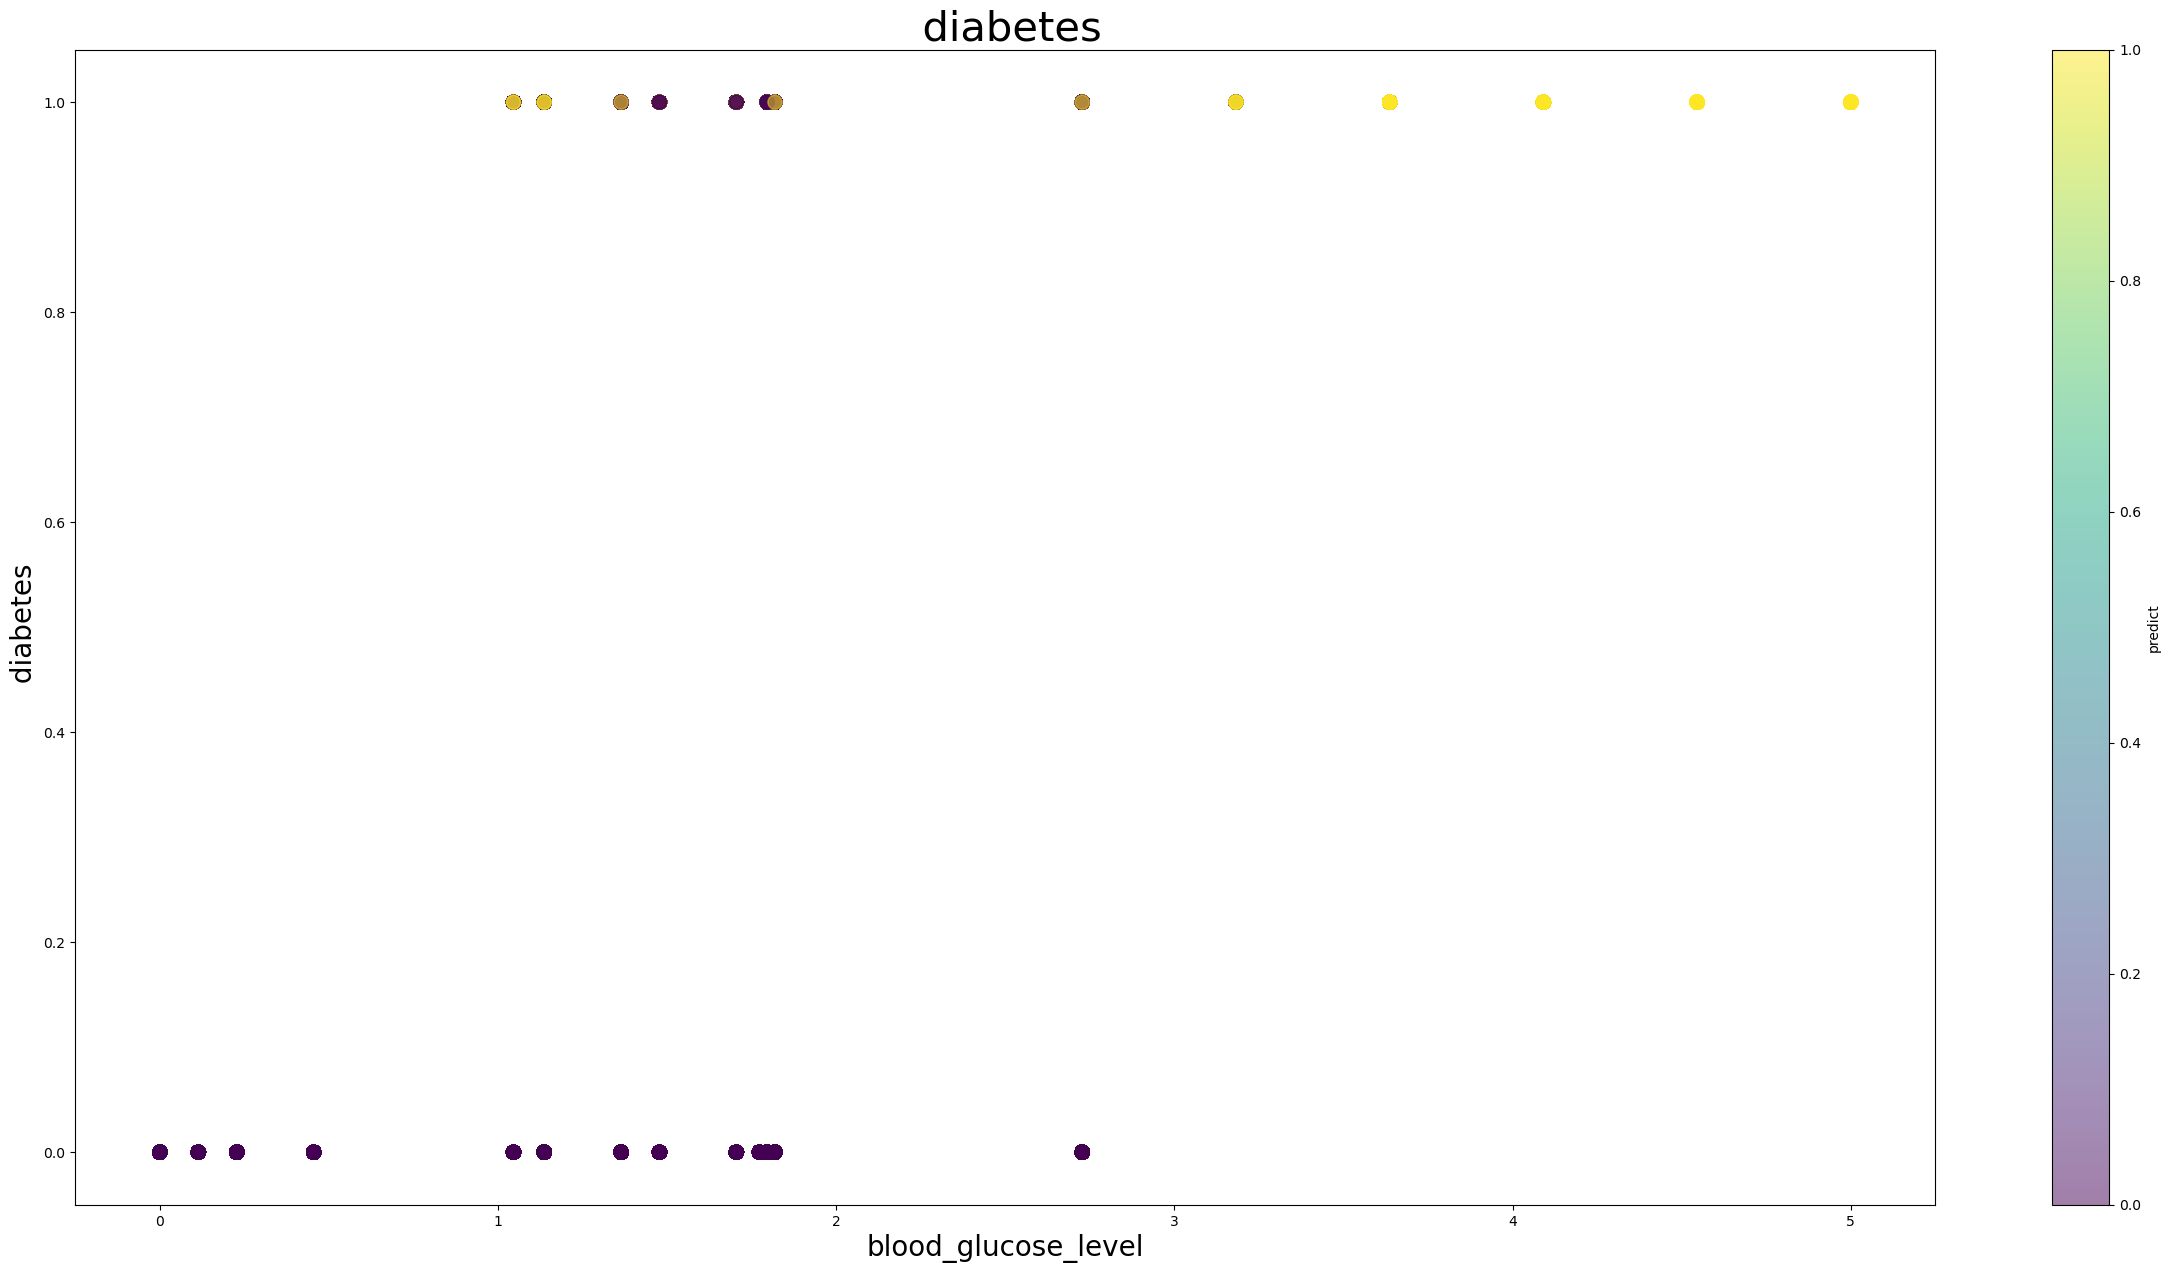

In [41]:
# we draw scatter between blood_glucose_level and diabetes 
#blood_glucose_level  is the higher corr
# we color the point y using predicted values
#from visualization we can see class 1 has alot of errors that class 0
plt.figure(figsize=(30,15))
blood=scaler.inverse_transform([logisticdata['blood_glucose_level']]) 
plt.scatter(blood,logisticdata['diabetes'],c=model.predict(xtotal),alpha=.5,s=100)
plt.xlabel("blood_glucose_level",fontsize=20)
plt.ylabel(" diabetes",fontsize=20)
plt.title("  diabetes ",fontsize=30)
plt.colorbar(label='predict')
plt.show()

This data is very good . Now we will  make overfiting and underfitting to solve them step by step : 

In [43]:
# first: i use one feature with small relation with our target 
# then determinate y and spilit data.
xtotal=logisticdata['age'].values
y=logisticdata['diabetes'].values
x_train,x_testev,y_train,y_testev=train_test_split(xtotal,y,test_size=0.4,random_state=1)
x_val,x_test,y_val,y_test=train_test_split(x_testev,y_testev,test_size=0.5,random_state=1)


In [44]:
# I use RandomForestRegressor model will big n_estimators to generate bad result.
model=RandomForestRegressor(n_estimators=500)
model.fit(x_train.reshape(-1,1),y_train)# reshape: to change it to 2D

RandomForestRegressor(n_estimators=500)

In [45]:
# Now we will calculate r2_score for (train,test,val)
y_predict=model.predict(x_val.reshape(-1,1))
r2=r2_score(y_val,y_predict)
r2

0.0744048202939076

In [46]:
y_predict=model.predict(x_train.reshape(-1,1))
r2=r2_score(y_train,y_predict)
r2

0.07842047126352025

In [47]:
y_predict=model.predict(x_test.reshape(-1,1))
r2=r2_score(y_test,y_predict)
r2

0.08155954932200649

we can notice that all r2_scores are bad.
This is called underfitting .
We can solve it by retrain model or using another model.
We already used another model that genetate big accuracy. This means we already solve this problem .

In [49]:
# we can also solve this problem by using more features.
# Now : we will do this to solve underfitting ,but we will make overfitting.
# we use all feature and spilit data ,but we use big n_estimators.
xtotal=logisticdata.iloc[:,:-1].values
y=logisticdata['diabetes'].values
x_train,x_testev,y_train,y_testev=train_test_split(xtotal,y,test_size=0.4,random_state=1)
x_val,x_test,y_val,y_test=train_test_split(x_testev,y_testev,test_size=0.5,random_state=1)

In [50]:
model=RandomForestRegressor(n_estimators=500)
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500)

In [51]:
# After we fitted the model. we will see the r2 for (train ,test,val)
y_predict=model.predict(x_train)
r2=r2_score(y_train,y_predict)
r2

0.9548041345660545

In [52]:
y_predict=model.predict(x_val)
r2=r2_score(y_val,y_predict)
r2

0.6588103473358478

In [53]:
y_predict=model.predict(x_test)
r2=r2_score(y_test,y_predict)
r2

0.6761503304254859

We can see that there are abig difference between accuracy of train and accuracy of test and val.
This case is called overfitting. We can solve it by alot of ways:
1) we can change value of hyperparameter
2) we can increase or desreace one or more features
3) we can use another model
4) we can use cross validation to compare between differnt models and choose the best.
5) we can increase the data
6) we can use cv to divide data by different way and calculate the mean of all results.
I will use four ways only (1,3,5,6)  

In [55]:
# I will use cv to divide the data into different ways and calculate val for each time .
# First : KFold : I will divide train data into 10 parts by ten different forms
# then we will calculate cv_scores
# then we will calculate the mean of all
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, x_train, y_train, cv=kfold)
# model : take the kind of model.X_train,y_train is the data that it will use it.
print("KFold CV Accuracies:", cv_scores)
print(f"Mean KFold Accuracy: {np.mean(cv_scores):.4f}")

KFold CV Accuracies: [0.69873848 0.71354665 0.68395431 0.69599689 0.64504483 0.69076691
 0.66825037 0.66470698 0.68948519 0.67834317]
Mean KFold Accuracy: 0.6829


In [56]:
# Second:StratifiedKFold
# since data is unbalanced .
#It work such kfold except that it deal with unbalance data.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, x_train, y_train, cv=skf, scoring='r2')

print("Stratified KFold CV Accuracies:", cv_scores)
print(f"Mean Stratified KFold Accuracy: {np.mean(cv_scores):.4f}")

Stratified KFold CV Accuracies: [0.67872404 0.70073365 0.68571287 0.6789373  0.68063349]
Mean Stratified KFold Accuracy: 0.6849


We can notice that results are very bad .
CV didn't solve overfitting here :-(


For this reason : I will try change value of hyperparameter.

In [59]:
# n_estimators is our hyperparameter
# we will use kfold to see the data by different ways to reach to the besst solution.
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# we put n_estimators between 100 and 200 ( step=10) to avoid overfitting.
n_estimators = range(100,200,10)
# we will use validation_curve to calcalute it ( it similar to grid search)
trainscore,testscore = validation_curve(
    # estimator: kind of our model
    estimator=model,
    #X,Y : data that it will use it. ( we use train only)
    X=x_train,
    y=y_train,
    param_name="n_estimators",    
    param_range=n_estimators,
    cv=kfold,
    # score to can evaluate if this value are good or not
    scoring="r2"
)

In [60]:
# train score have the r2 of train part for all iteration (50 times)
trainscore

array([[0.95281675, 0.95356891, 0.9540939 , 0.95462844, 0.952976  ],
       [0.95293405, 0.95398213, 0.95471663, 0.95429507, 0.95367285],
       [0.95281869, 0.95423465, 0.95512219, 0.95464677, 0.95389741],
       [0.95336674, 0.95401975, 0.95494661, 0.9551003 , 0.95333873],
       [0.95306617, 0.95456085, 0.95491165, 0.95483864, 0.95364552],
       [0.95330045, 0.95395528, 0.95525156, 0.95533017, 0.95404889],
       [0.95344932, 0.95424854, 0.95543134, 0.95511643, 0.95372912],
       [0.95317936, 0.95482023, 0.95539775, 0.95486761, 0.95406352],
       [0.953668  , 0.95460884, 0.95556648, 0.9550059 , 0.95434696],
       [0.95363564, 0.95442255, 0.95547219, 0.95518298, 0.95451402]])

In [61]:
# test score have the r2 of test part for all iteration (50 times)
testscore

array([[0.70420063, 0.6874493 , 0.66576414, 0.666816  , 0.68162194],
       [0.70552602, 0.68601459, 0.66712318, 0.66525299, 0.68271035],
       [0.70496816, 0.68679462, 0.66685943, 0.66578505, 0.68232689],
       [0.705864  , 0.68421469, 0.66866578, 0.66829883, 0.68163793],
       [0.70545688, 0.68659768, 0.66582826, 0.66738077, 0.68046698],
       [0.70659673, 0.68746583, 0.66589202, 0.66715442, 0.68002727],
       [0.70553765, 0.68659387, 0.66612592, 0.66763563, 0.68097561],
       [0.70528274, 0.68734428, 0.66660441, 0.66827271, 0.68020804],
       [0.70402898, 0.68695516, 0.66785697, 0.66807526, 0.68054619],
       [0.70670184, 0.68632711, 0.66744525, 0.66771715, 0.68098434]])

We can notice that all train score are bigger than test score. 
we still have overfitting.

In [63]:
# Now we will calculate the mean of all row of test, and select the max to use it to know position of our best value for parameter.
test_mean = np.mean(testscore, axis = 0)
print(max(test_mean))
np.where(test_mean == max(test_mean))

0.7054163624566872


(array([0], dtype=int64),)

In [64]:
# best value for n_estimators exist in array[0] (100)
n = n_estimators[0]

This way failed. we will try another solution.
we will compare between three different classifaction models (KNN,RandomForest ,Logistic).
I will compare by 2 ways.
First: I will use validation data to select best model.

In [66]:
# I determent my models with best hyperparameter that i calculted.
models={'Random forest': RandomForestRegressor(n_estimators=n),"Logistic": LogisticRegression(),
        "KNN":KNeighborsClassifier(n_neighbors=9)}
# comparemodels1 : it will have the name of all model and its accuracy.
comparemodels1={}
# we will fit each model by using train data and predict by using x_val
# Then we calculte if this model is good or bad by using val_data
for name,model in models.items():
     model.fit(x_train,y_train)
     y_predict=model.predict(x_val)
    # Random forest need r2 , other need accuracy_score to evaluate them
     if name !='Random forest':
        comparemodels1[name] = accuracy_score(y_val,y_predict)
     else:
        comparemodels1[name] = r2_score(y_val,y_predict)
# we sort the dictionary desc 
comparemodels1=dict(sorted(comparemodels1.items(),key=lambda item: item[1],reverse=True))
comparemodels1

{'KNN': 0.9584481772323054,
 'Logistic': 0.955535909303656,
 'Random forest': 0.655591379273551}

In [67]:
# second way:
# I use cross valdition to choose best model.
comparemodels2={}
for name,model in models.items():
    # we will apply KFold on each model and calculate the mean of cv_score
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, x_train, y_train, cv=kfold)
    comparemodels2[name] = np.mean(cv_scores)
# we will order them depond on mean of cv_score
comparemodels2=dict(sorted(comparemodels2.items(),key=lambda item: item[1],reverse=True))
comparemodels2

{'KNN': 0.9611351136893372,
 'Logistic': 0.9595748709744967,
 'Random forest': 0.6800689333233355}

From two ways we can see that KNN is the best and random is the worst.
we already used it . we will use logistic now instead of it.

In [69]:
# we will take an object of LogisticRegression, then we will fit the model by using training data.
multilog= LogisticRegression()
multilog.fit(x_train,y_train)
y_predict=model.predict(x_train)
# To Ensure if it good or not we will show accurcy of ( train,test,val)
print(accuracy_score(y_train,y_predict))
y_predict=model.predict(x_val)
print(accuracy_score(y_val,y_predict))
y_predict=model.predict(x_test)
print(accuracy_score(y_test,y_predict))

0.9652608039939674
0.9584481772323054
0.9593863754550181


It produce a very good results .
Without underfitting or overfitting.

In [121]:
# we will show the precision , recall , f1-score  for test data.
#recall:Sensitivity or true positive rate.we use it when we FN is costly.
#precision:show how many of predicted positive are actually correct.we use it when we FP is costly.
#f1_score:when FN,FP are costly.

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17502
           1       0.93      0.59      0.72      1728

    accuracy                           0.96     19230
   macro avg       0.95      0.79      0.85     19230
weighted avg       0.96      0.96      0.96     19230

